# Train model_62x62_3_e2_4230 #

## Oerview ##

|Model|People|Training images|Validation images|Total Iteration|Best Top-1 accuracy on validation set|
| ----|----|----- |----- |
|62x62_3_e2_4230|4,230|143,939|13,977|800,000|0.692015 (Iter 650,000)|

## Dataset ##

|Dataset|People|Image|Size|
| ----|----|----- |----- |
|CASIA-WebFace-custom|10575|392304|62x62|

- training set: 40% people of CASIA-WebFace-custom, 90% images of each training person (randomly select)
  - 4230 people, 143939 images
- validation set: remaining 10% images of each training person
  - 4230 people, 13977 images

## Net settings ##

In [1]:
!echo $CAFFE_ROOT

!cp $CAFFE_ROOT/tools/extra/plot_training_log.py.example $CAFFE_ROOT/tools/extra/plot_training_log.py

/opt/caffe


In [2]:
from IPython.display import Image

In [3]:
!cat /workspace/tools/deepid/model/62x62_3_e2_4230/solver.prototxt

net: "/workspace/tools/deepid/model/62x62_3_e2_4230/train_val.prototxt"
test_iter: 109
test_interval: 1000

base_lr: 0.005
lr_policy: "step"
gamma: 0.95
stepsize: 100000
momentum: 0.9
weight_decay: 0.0005

display: 100
max_iter: 800100
snapshot: 50000
snapshot_prefix: "/workspace/tools/deepid/model/62x62_3_e2_4230/snapshot/snapshot"
solver_mode: GPU
device_id:0
#debug_info: true


## Draw Net ##

In [4]:
!python $CAFFE_ROOT/python/draw_net.py /workspace/tools/deepid/model/62x62_3_e2_4230/train_val.prototxt \
./deepid_convnet_TB.png \
--rankdir TB

/opt/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/opt/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/opt/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
Drawing net to ./deepid_convnet_TB.png


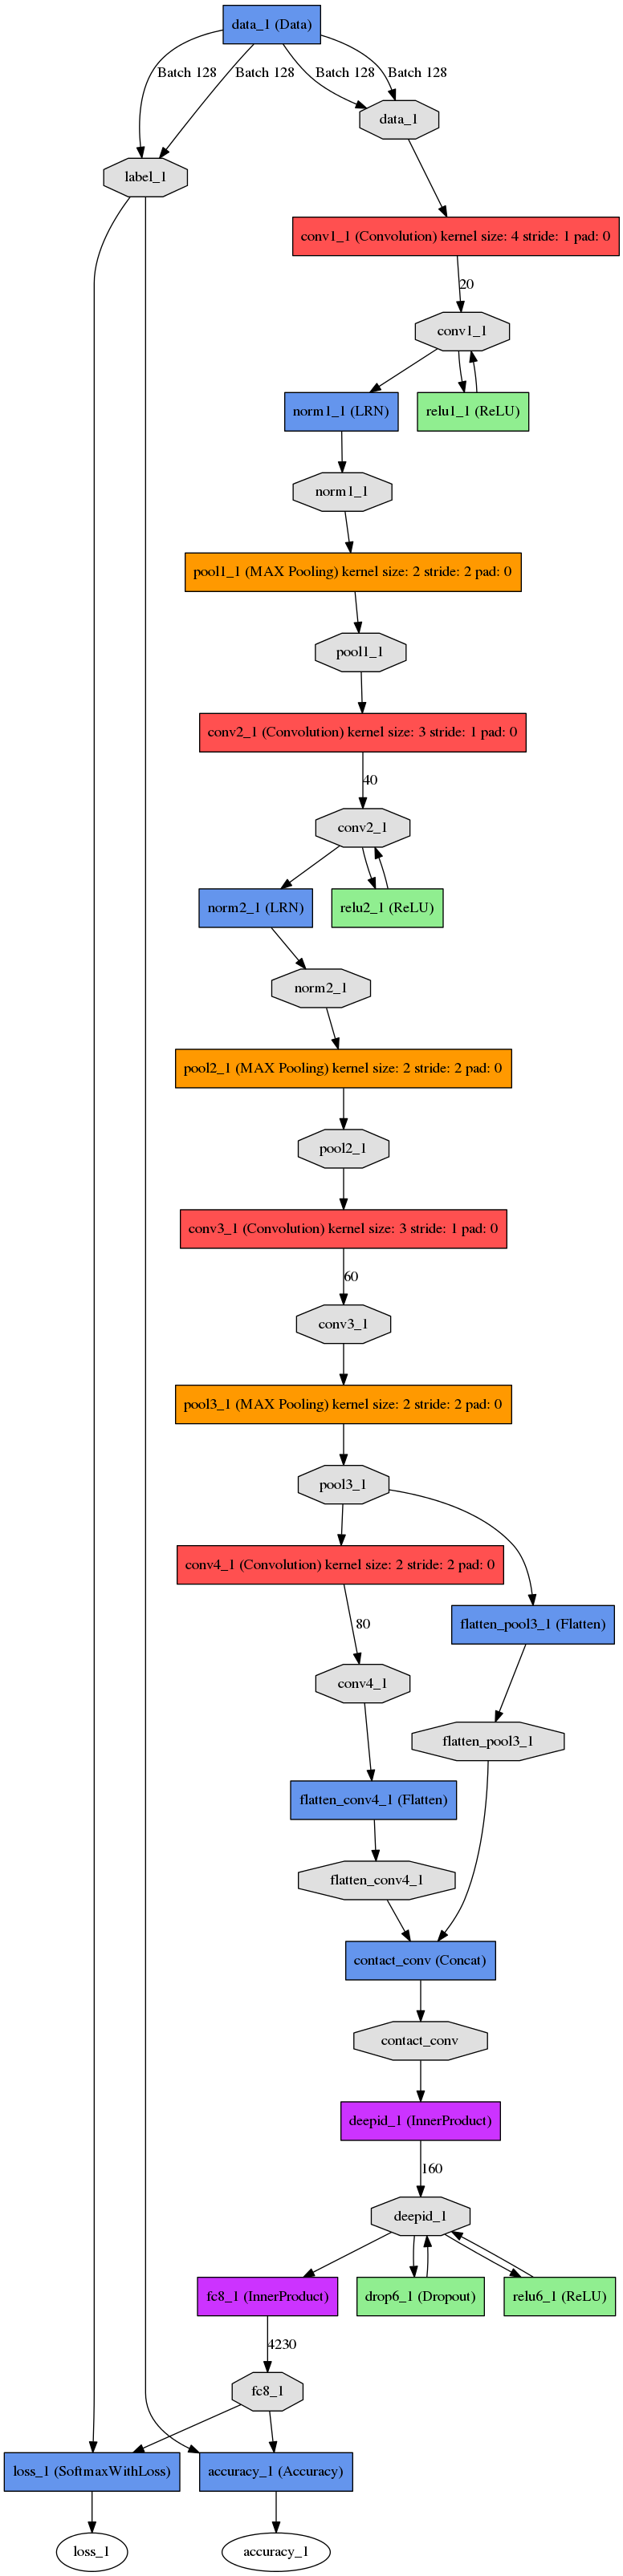

In [5]:
Image(filename='deepid_convnet_TB.png')

## Parse log ##

In [9]:
!python $CAFFE_ROOT/tools/extra/plot_training_log.py 6 \
./train_loss_iters_20160414.png \
/workspace/tools/deepid/log/62x62_3_e2_4230/caffe-20160412-235206.log \
/workspace/tools/deepid/log/62x62_3_e2_4230/caffe-20160414-221912.log

In [10]:
!python $CAFFE_ROOT/tools/extra/plot_training_log.py 0 \
./test_accuracy_iters_20160414.png \
/workspace/tools/deepid/log/62x62_3_e2_4230/caffe-20160412-235206.log \
/workspace/tools/deepid/log/62x62_3_e2_4230/caffe-20160414-221912.log

In [11]:
!python $CAFFE_ROOT/tools/extra/plot_training_log.py 4 \
./train_learning_rate_iters_20160414.png \
/workspace/tools/deepid/log/62x62_3_e2_4230/caffe-20160412-235206.log \
/workspace/tools/deepid/log/62x62_3_e2_4230/caffe-20160414-221912.log

- training log
  - [process-1](./caffe-20160412-235206.log.train)
  - [process-2](./caffe-20160414-221912.log.train)
- validation log
  - [process-1](./caffe-20160412-235206.log.test)
  - [process-2](./caffe-20160414-221912.log.test)

## Display plot ##

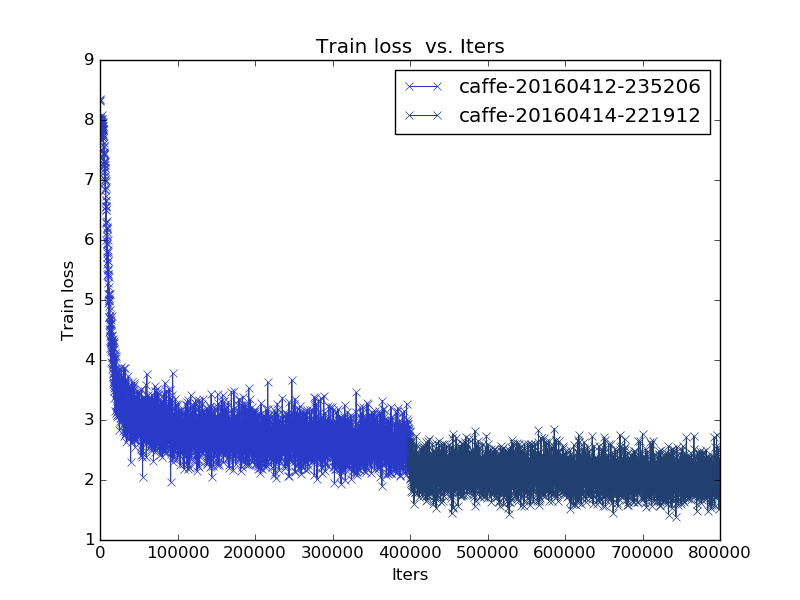

In [12]:
Image(filename='train_loss_iters_20160414.png')

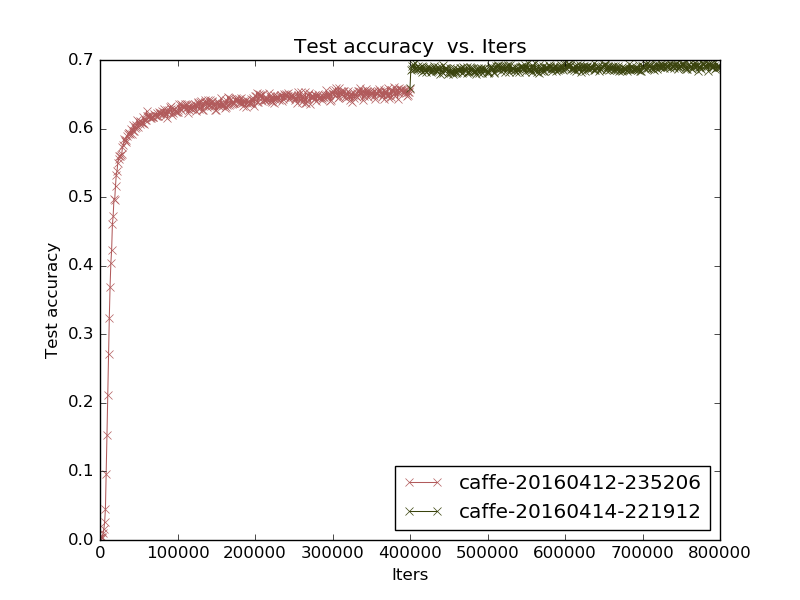

In [13]:
Image(filename='test_accuracy_iters_20160414.png')

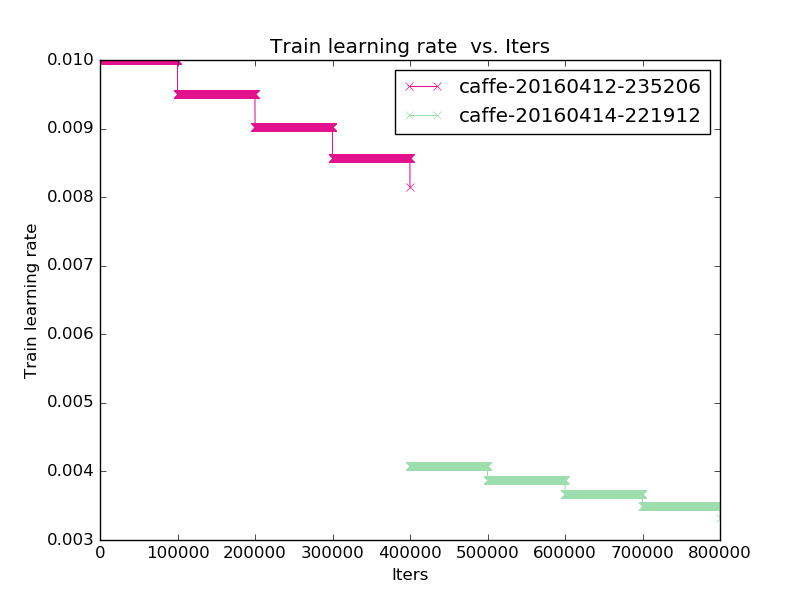

In [14]:
Image(filename='train_learning_rate_iters_20160414.png')

## Choose Best model ##

- load the validation log and choose the iter which has the best top-1 accuracy

```
The model in iter:  50000.0  top-1 accuracy: 0.609447
The model in iter:  100000.0  top-1 accuracy: 0.623567
The model in iter:  150000.0  top-1 accuracy: 0.627652
The model in iter:  200000.0  top-1 accuracy: 0.646932
The model in iter:  250000.0  top-1 accuracy: 0.647004
The model in iter:  300000.0  top-1 accuracy: 0.650803
The model in iter:  350000.0  top-1 accuracy: 0.65238
The model in iter:  400000.0  top-1 accuracy: 0.657182
The model in iter:  400000.0  top-1 accuracy: 0.658544
The model in iter:  450000.0  top-1 accuracy: 0.683916
The model in iter:  500000.0  top-1 accuracy: 0.681479
The model in iter:  550000.0  top-1 accuracy: 0.68793
The model in iter:  600000.0  top-1 accuracy: 0.69008
The model in iter:  650000.0  top-1 accuracy: 0.692015
The model in iter:  700000.0  top-1 accuracy: 0.68922
The model in iter:  750000.0  top-1 accuracy: 0.691585
The model in iter:  800000.0  top-1 accuracy: 0.69008
The best model iter in process: 650000.0  top-1 accuracy: 0.692015
```

In [15]:
def load_data(data_file, field_idx0, field_idx1):
    data = [[], []]
    with open(data_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line[0] != '#':
                fields = line.split()
                data[0].append(float(fields[field_idx0].strip()))
                data[1].append(float(fields[field_idx1].strip()))
    return data

In [16]:
iters = []
accuracys = []

iter_accuracys = load_data('./caffe-20160412-235206.log.test', 0, 2)
iters = iters + iter_accuracys[0]
accuracys = accuracys + iter_accuracys[1]

iter_accuracys = load_data('./caffe-20160414-221912.log.test', 0, 2)
iters = iters + iter_accuracys[0]
accuracys = accuracys + iter_accuracys[1]

assert(len(iters) == len(accuracys))

In [17]:
tmp_iters = []
tmp_accuracys = []
i = 0
# iter which is stored
for i in range(len(iters)):
    if iters[i] % 50000 == 0 and iters[i] != 0:
        tmp_iters.append(iters[i])
        tmp_accuracys.append(accuracys[i])
    i = i + 1

iters = tmp_iters
accuracys = tmp_accuracys

In [18]:
max_accuracy = 0
iter_selected = 0

for i in range(len(iters)):
    print "The model in iter: ", iters[i], " top-1 accuracy:", accuracys[i]

    if accuracys[i] >= max_accuracy:
        max_accuracy = accuracys[i]
        iter_selected = iters[i]

print "The best model iter in process:", iter_selected, " top-1 accuracy:", max_accuracy

The model in iter:  50000.0  top-1 accuracy: 0.609447
The model in iter:  100000.0  top-1 accuracy: 0.623567
The model in iter:  150000.0  top-1 accuracy: 0.627652
The model in iter:  200000.0  top-1 accuracy: 0.646932
The model in iter:  250000.0  top-1 accuracy: 0.647004
The model in iter:  300000.0  top-1 accuracy: 0.650803
The model in iter:  350000.0  top-1 accuracy: 0.65238
The model in iter:  400000.0  top-1 accuracy: 0.657182
The model in iter:  400000.0  top-1 accuracy: 0.658544
The model in iter:  450000.0  top-1 accuracy: 0.683916
The model in iter:  500000.0  top-1 accuracy: 0.681479
The model in iter:  550000.0  top-1 accuracy: 0.68793
The model in iter:  600000.0  top-1 accuracy: 0.69008
The model in iter:  650000.0  top-1 accuracy: 0.692015
The model in iter:  700000.0  top-1 accuracy: 0.68922
The model in iter:  750000.0  top-1 accuracy: 0.691585
The model in iter:  800000.0  top-1 accuracy: 0.69008
The best model iter in process: 650000.0  top-1 accuracy: 0.692015
